Need to rerun the following:
1. disagreement + Hopper-v2 + seed 0 1 + ppo-hyper
2. disagreement + SparseHopper-v2 + seed 0 1 2  + ppo-hyper
3. disagreement + SparseHumanoid-v2 + seed 0 1 2 3 4 + ppo-hyper0

In [69]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter

dir_name = './eipo_results'
num_env = 32
num_step = 32
envs = [
    'Hopper-v2',
    'Walker2d-v2',
    'HalfCheetah-v2',
    'Ant-v2',
    'Humanoid-v2',
    'SparseHopper-v2',
    'SparseWalker2d-v2',
    'SparseHalfCheetah-v2',
    'SparseAnt-v2',
    'SparseHumanoid-v2',
]

bonus_types = [
    'dynamics',
    'disagreement',
    'icm',
]

seeds = [
    0,
    1,
    2,
    3,
    4,
]

ppo_hyper = True

ValueError: 

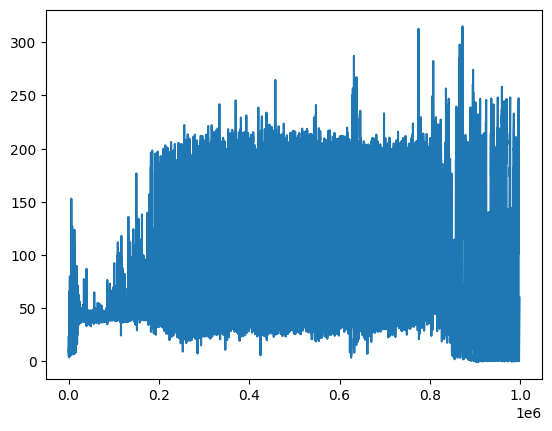

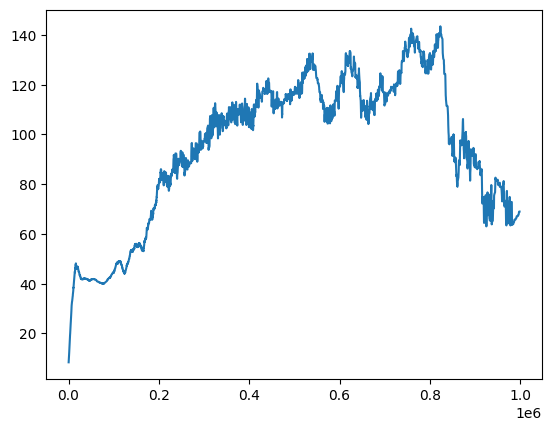

In [64]:
for env in envs:
    for seed in seeds:
        for bonus_type in bonus_types:
            file_name = f"{dir_name}/eipo_{bonus_type}_{num_env}_{num_step}_{env}_{seed}{'_ppo_hyper' if ppo_hyper else ''}.npy"
            file = np.load(file_name)
            # print(file[:, 1].max(), bonus_type, env, seed)
            # interp_func = make_interp_spline(file[:, 0], file[:, 1])
            # lp = np.linspace(0, int(1e6), 20000)
            # rollin_single_inter = interp_func(lp)
            # plt.plot(file[:, 0], file[:, 1])
            # print(rollin_single_inter)
            plt.figure()
            plt.plot(file[:, 0], file[:, 1], label='original')
            
            plt.figure()
            plt.plot(file[:, 0], savgol_filter(file[:, 1], window_length=300, polyorder=1), label='original')
            raise ValueError
            
    

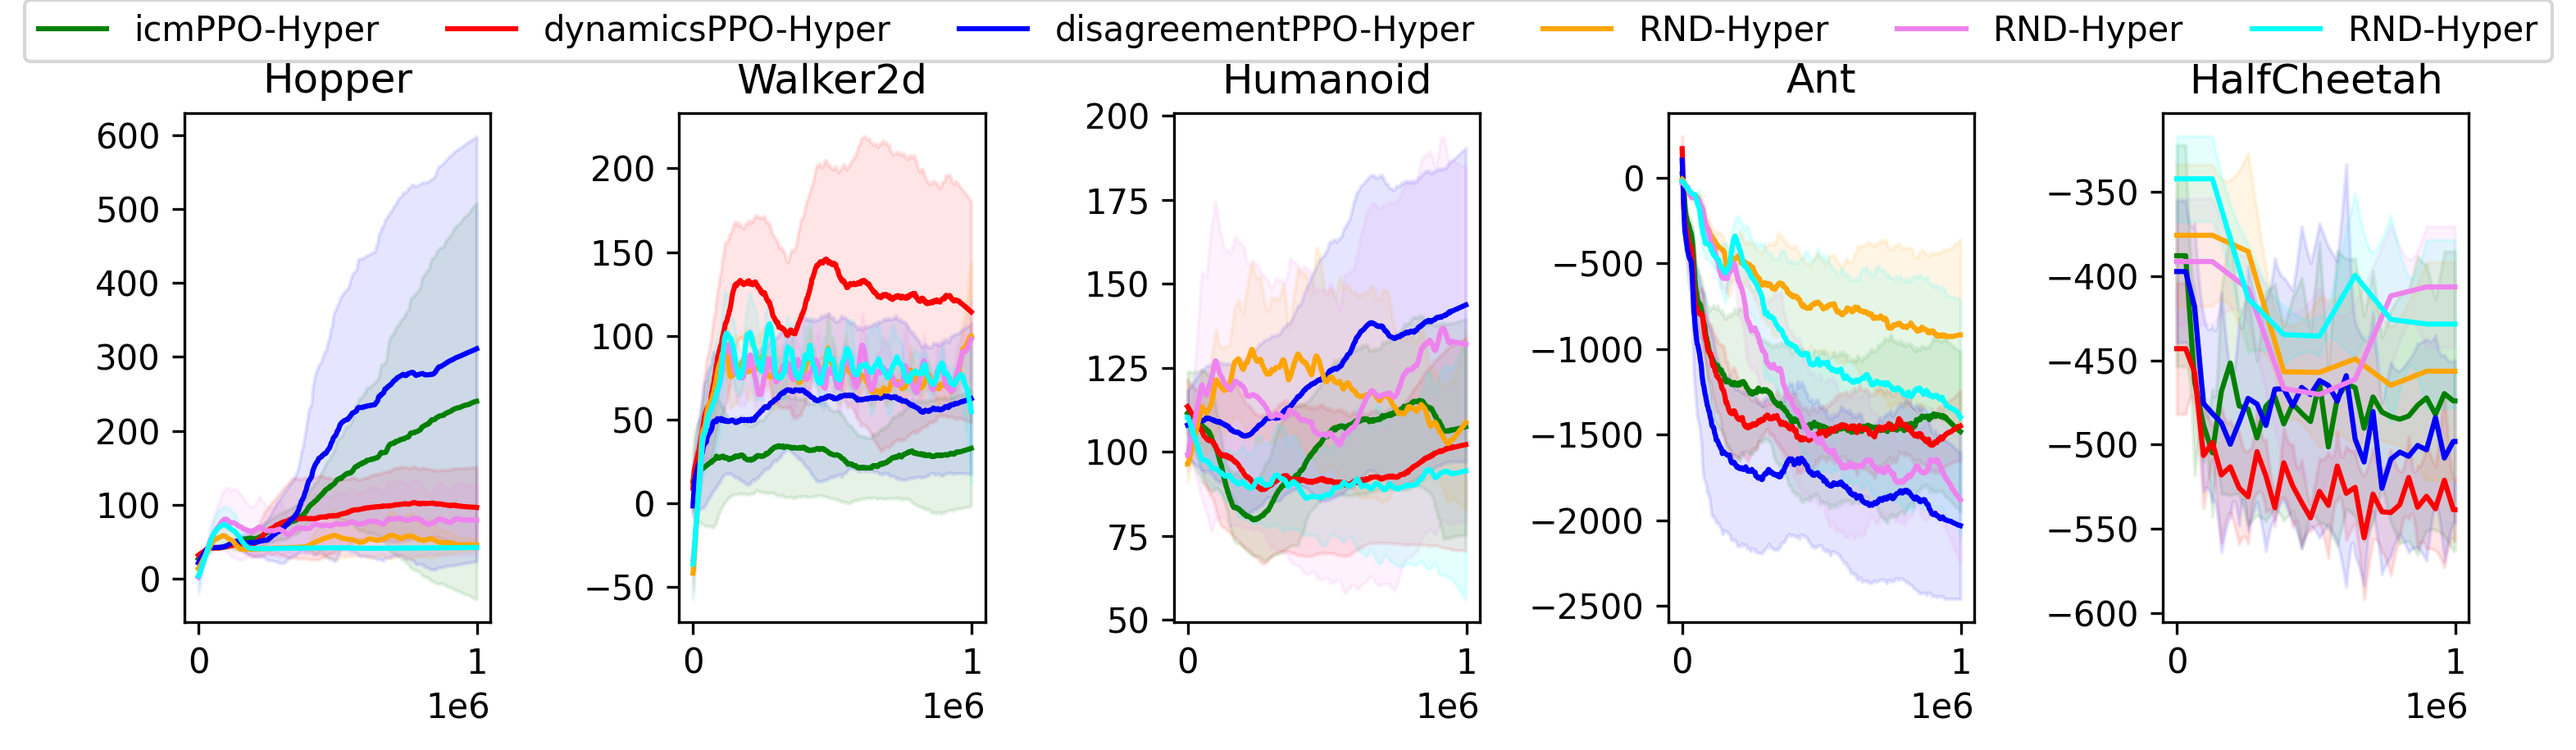

In [76]:
dense_envs = ['Hopper', 'Walker2d', 'Humanoid', 'Ant', 'HalfCheetah']
# dense_envs = ['Hopper', 'Walker2d', 'Ant', 'HalfCheetah']
sparse_envs = ['SparseHopper', 'SparseWalker2d', 'SparseHumanoid', 'SparseAnt', 'SparseHalfCheetah']
colors = ['g', 'r', 'b', 'v', 'y', 'o']

def plot(
    axes,
    bonus_type='icm',
    color='g',
    envs=dense_envs,
    lams=['1000.0', '100.0', '50.0', '10.0', '1.0'],
    seeds=[4, 3, 2, 0, 1],
    ppo_hyper=True,
):
    if ppo_hyper:
        num_env = 32
        num_step = 32
    else:
        num_env = 128
        num_step = 128
    
    interpolation_line = np.arange(0, int(1e6), 2000)
    
    
    for i, env in enumerate(envs):
        # env = 'Walker2d'\
        rollin = []
        for seed in seeds:
            file_name_rollin = f"{dir_name}/eipo_{bonus_type}_{num_env}_{num_step}_{env}-v2_{seed}{'_ppo_hyper' if ppo_hyper else ''}.npy"
            rollin_single = np.load(file_name_rollin)
            # print(rollin_single[:, 1].max(), env)
            x, y = rollin_single[:, 0], rollin_single[:, 1]
            # print(len(x), env, 'ppo_hyper' if ppo_hyper else 'rnd_hyper')
            if 'HalfCheetah' not in env:
                y = savgol_filter(y, window_length=int(len(x) * 0.1), polyorder=1)
            rollin_single_inter = np.interp(interpolation_line, x, y)
            rollin.append(rollin_single_inter)

        rollin = np.stack(rollin, axis=1)

        rollin_mean = np.mean(rollin, axis=1)
        # print(env, rollin_mean.max(), rollin[:, 1].max())
        rollin_std = np.std(rollin, axis=1)

        # rollin = convolve(kernel, rollin_mean, mode='valid')
        t = np.arange(len(rollin))

        axes[i].set_title(env.split('-')[0])
        axes[i].plot(interpolation_line, rollin_mean, label=bonus_type + "PPO-Hyper" if ppo_hyper else "RND-Hyper", color=color)

        axes[i].fill_between(interpolation_line, rollin_mean - rollin_std[t], rollin_mean + rollin_std[t], color=color, alpha=0.1)

    return

fig, axes = plt.subplots(1, 5, figsize=(10, 3), dpi=300)
fig.tight_layout()

plot(axes, bonus_type='icm', color='green')
plot(axes, bonus_type='dynamics', color='red')
plot(axes, bonus_type='disagreement', color='blue')
plot(axes, bonus_type='icm', color='orange', ppo_hyper=False)
plot(axes, bonus_type='dynamics', color='violet', ppo_hyper=False)
plot(axes, bonus_type='disagreement', color='aqua', ppo_hyper=False)



handles, labels = axes[0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='upper center', borderaxespad=0, ncols=9)

SparseHopper 0.0 0.0
SparseWalker2d 0.0 0.0
SparseHumanoid 0.002979293558711157 0.0
SparseAnt 0.06794802271636777 0.09914413390896006
SparseHalfCheetah 0.0 0.0
SparseHopper 0.11131855309218201 0.0
SparseWalker2d 0.0 0.0
SparseHumanoid 0.004386554693640432 0.01971153846153846
SparseAnt 0.0525412658318969 0.029747868674043155
SparseHalfCheetah 0.0 0.0
SparseHopper 0.24130316772522584 0.7300094073377233
SparseWalker2d 0.0 0.0
SparseHumanoid 0.0028464999605569267 0.0
SparseAnt 0.06902142970080914 0.09848484848484847
SparseHalfCheetah 0.0 0.0


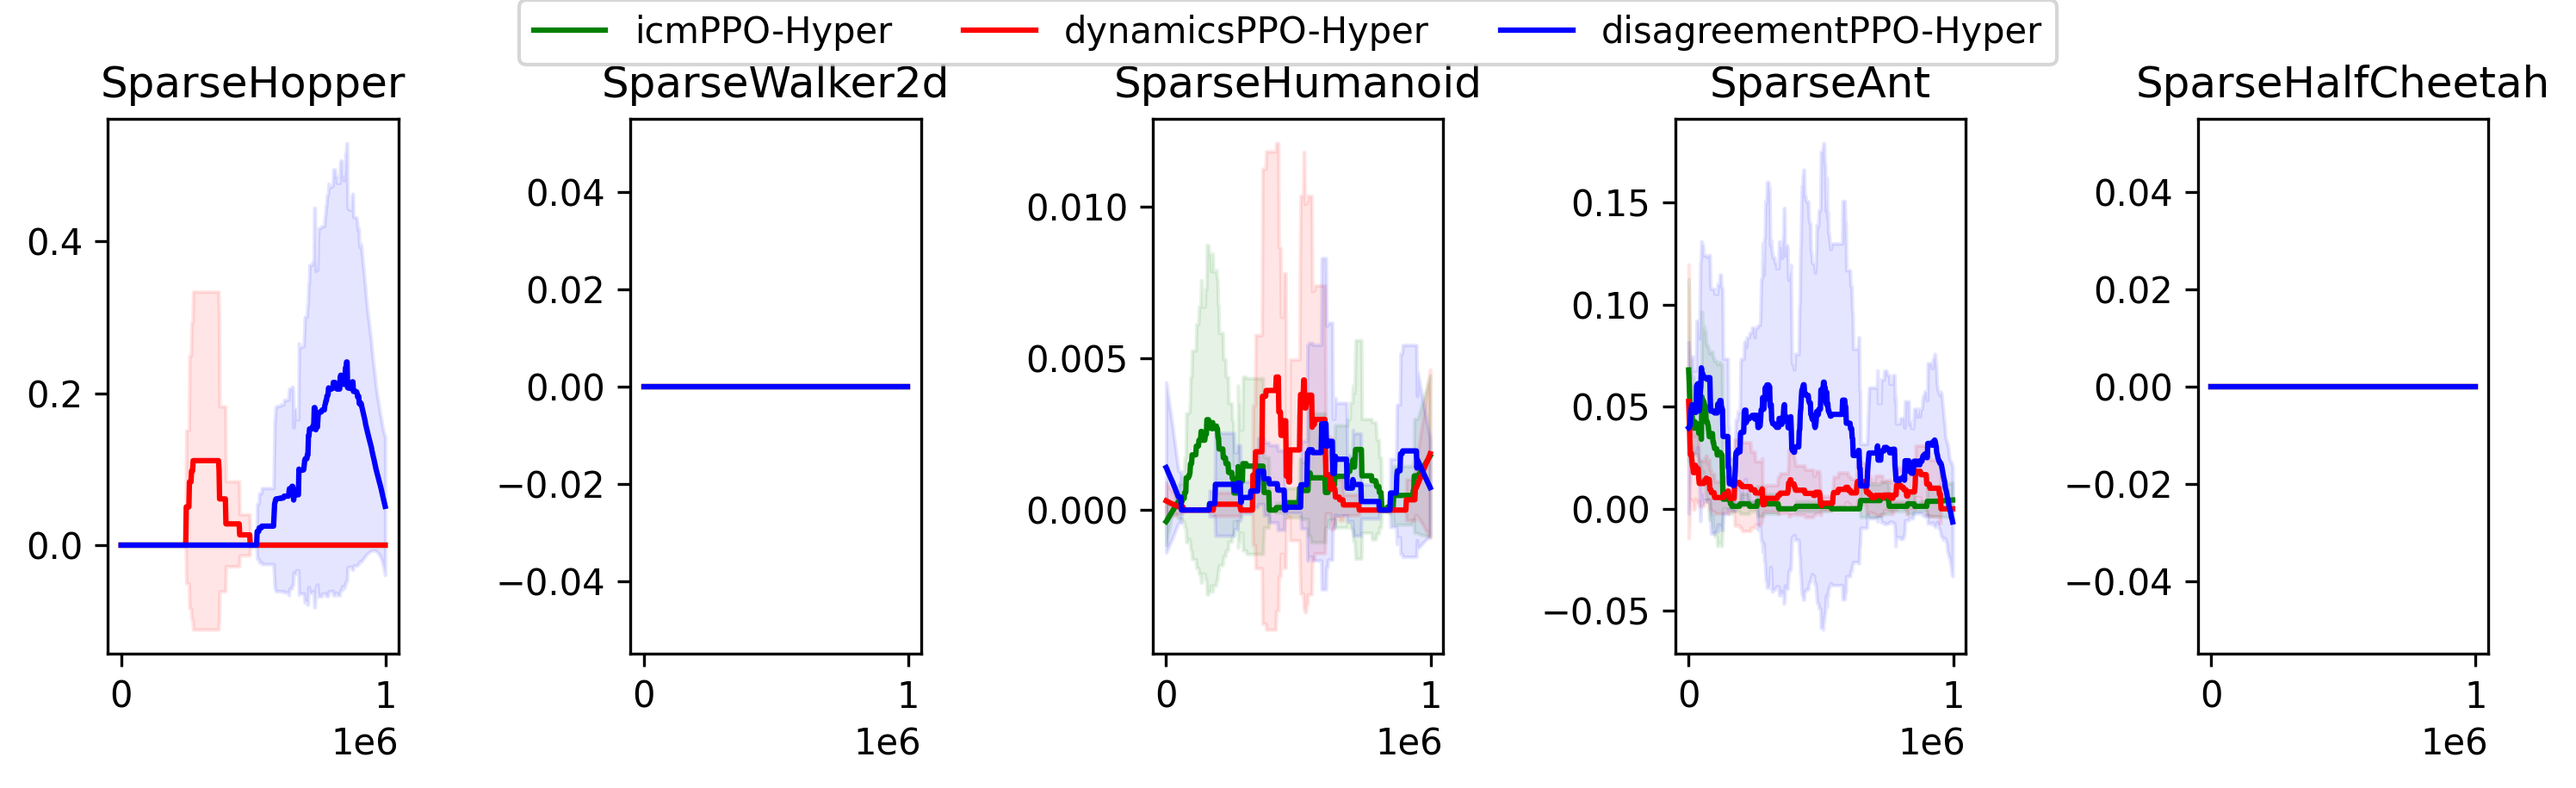

In [68]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3), dpi=300)
fig.tight_layout()

plot(axes, bonus_type='icm', color='green', envs=sparse_envs)
plot(axes, bonus_type='dynamics', color='red', envs=sparse_envs)
plot(axes, bonus_type='disagreement', color='blue', envs=sparse_envs)



handles, labels = axes[0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles, labels, loc='upper center', borderaxespad=0, ncols=9)